In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv(r'/kaggle/input/corona-virus-report/country_wise_latest.csv')

In [4]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
df.shape

(187, 15)

# **EDA 1**

# **top 10 country that has been given maximum number of covid cases**

In [6]:
max_cov = df[['Country/Region' , 'Confirmed']]

In [7]:
max_cov = max_cov.sort_values(ascending = False , by = 'Confirmed')[0:10]

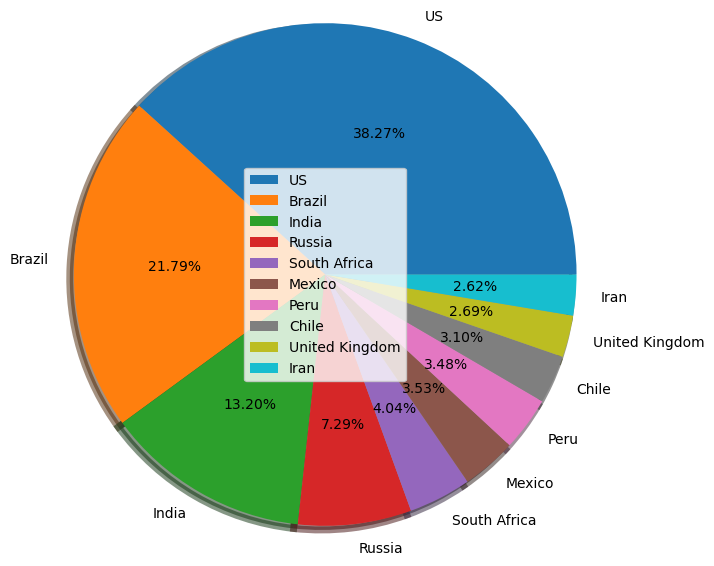

In [8]:

plt.pie(max_cov['Confirmed'],labels = max_cov['Country/Region'],shadow = True , autopct= "%0.2f%%",radius = 1.7,labeldistance=1.1,startangle = 0
       , textprops = {'fontsize':10},wedgeprops = {'linewidth':5});
plt.legend(loc =10)

> **insight:- US has given maximum number of covid cases**

# **top 10 countrys that has recorded max number of death cases**

In [9]:
max_dth = df[['Country/Region','Deaths']]

In [10]:
max_dth = max_dth.sort_values(ascending = False , by = 'Deaths')[0:10]

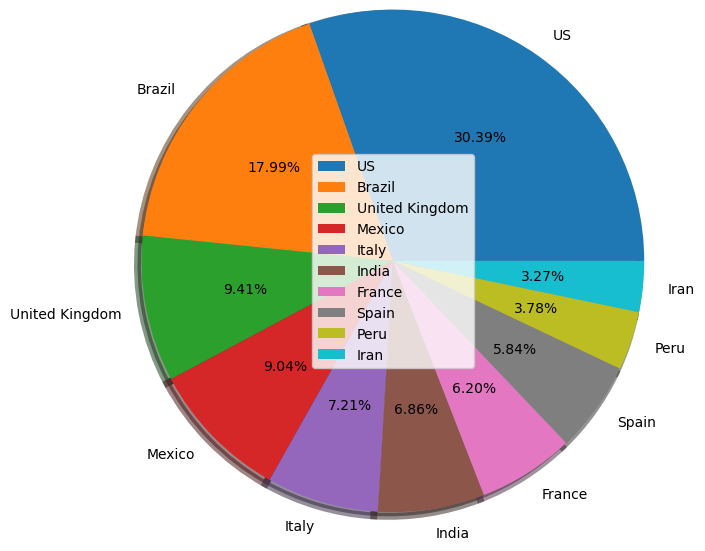

In [11]:
plt.pie(max_dth['Deaths'] , labels = max_dth['Country/Region'] , shadow = True , autopct = "%0.2f%%" , radius = 1.7
       ,textprops = {'fontsize':10},wedgeprops = {'linewidth':5});
plt.legend(loc = 10)

> **insight:- US has the heighest mortality rate**

# **percentage of recovery in respective states**

In [12]:
rec_data = df[['Country/Region','Recovered']]

In [13]:
rec_data = rec_data.sort_values(ascending=False , by = 'Recovered')[0:10]

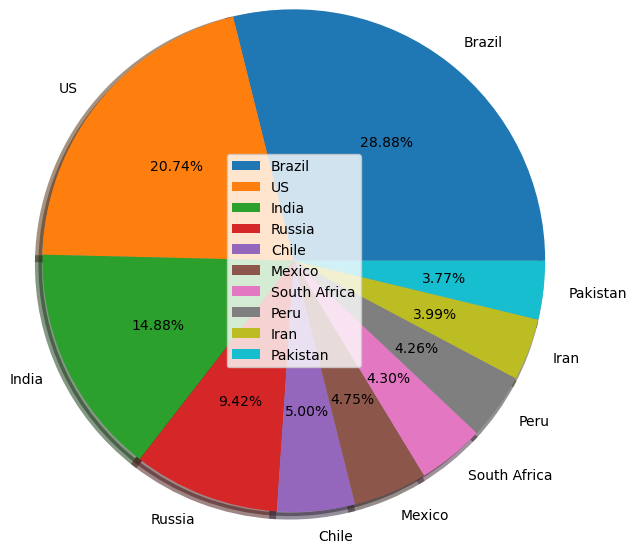

In [14]:
plt.pie(rec_data['Recovered'] , labels = rec_data['Country/Region'],shadow = True,autopct = "%0.2f%%"
       ,radius = 1.7 , textprops = {'fontsize':10},wedgeprops = {'linewidth':5});
plt.legend(loc = 10)

> **BRAZIL has the heighest recovery rate**

In [15]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


# **most active cases coming from which country**

In [16]:
act_data = df[['Country/Region' , 'Active']]

In [17]:
act_data =act_data.sort_values(ascending = False , by = 'Active')[0:10]

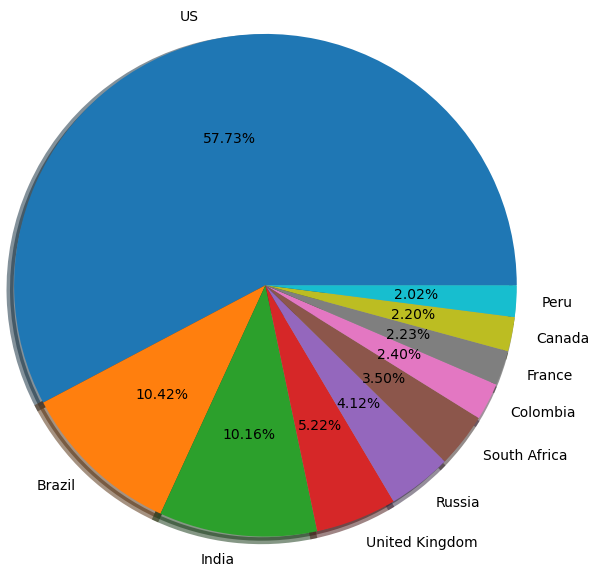

In [18]:
plt.pie(act_data['Active'],labels =act_data['Country/Region'],shadow = True , autopct = "%0.2f%%" , radius = 1.7,
       textprops = {'fontsize':10},wedgeprops = {'linewidth':5});

> **US got the most active cases mow a days as usual**

# **country that rises in death cases in new cases**

In [19]:
newdt_data = df[['Country/Region' , 'New deaths']]

In [20]:
newdt_data = newdt_data.sort_values(ascending = False , by = 'New deaths')[0:10]

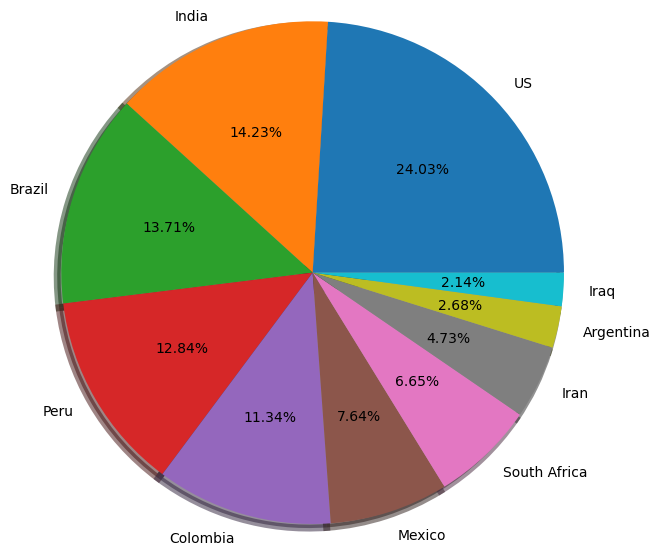

In [21]:
plt.pie(newdt_data['New deaths'] , labels = newdt_data['Country/Region'],autopct = "%0.2f%%" , shadow = True
       , radius = 1.7 , textprops = {'fontsize':10},wedgeprops = {'linewidth':5});

> **US got the rise in new death case**

# **new recovery trend in world**

In [22]:
newrc_data = df[['Country/Region' , 'New recovered']]

In [23]:
newrc_data = newrc_data.sort_values(ascending = False , by = 'New recovered')[0:10]

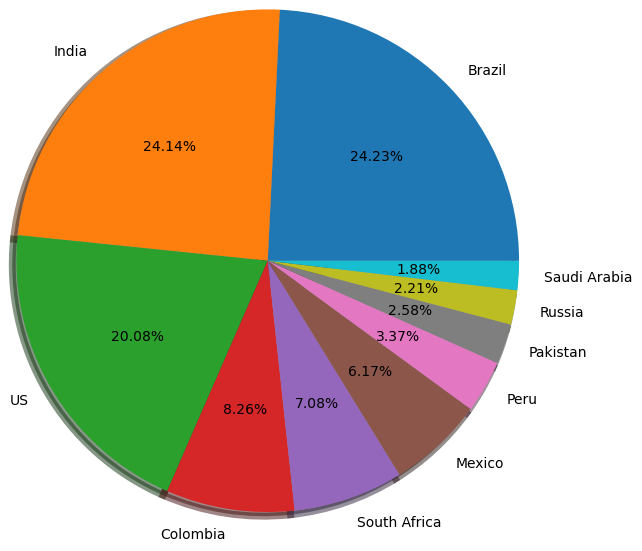

In [24]:
plt.pie(newrc_data['New recovered'] , labels = newrc_data['Country/Region'],autopct = "%0.2f%%" , shadow = True
       , radius = 1.7 , textprops = {'fontsize':10},wedgeprops = {'linewidth':5});

> **BRAZIL and INDIA is giving the maximum recovery cases in world**

In [25]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


# **which country experiences the maximum frequency of death case**

In [26]:
freq_death = df[['Country/Region','Deaths / 100 Cases']]

In [27]:
freq_death = freq_death.sort_values(ascending = False,by= 'Deaths / 100 Cases')[0:10]

<Axes: xlabel='Deaths / 100 Cases', ylabel='Country/Region'>

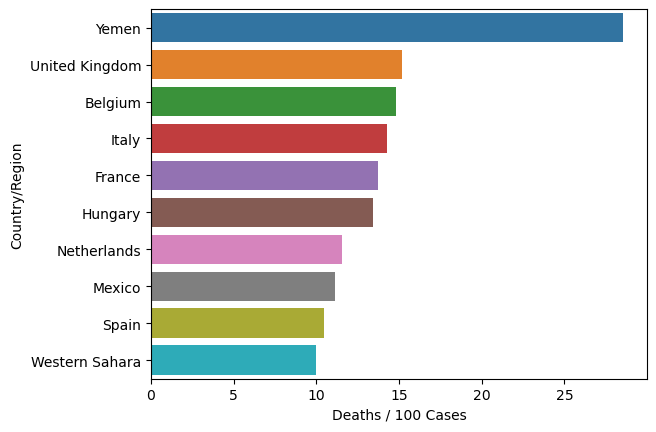

In [28]:
sns.barplot(freq_death , y = 'Country/Region' , x = 'Deaths / 100 Cases')

> **yemen got the maxium death frequency**

# **which country experiences the maximum frequency of recovery case**

In [29]:
freq_recv = df[['Country/Region','Recovered / 100 Cases']]

In [30]:
freq_recv = freq_recv.sort_values(ascending = False,by= 'Recovered / 100 Cases')[0:10]

<Axes: xlabel='Recovered / 100 Cases', ylabel='Country/Region'>

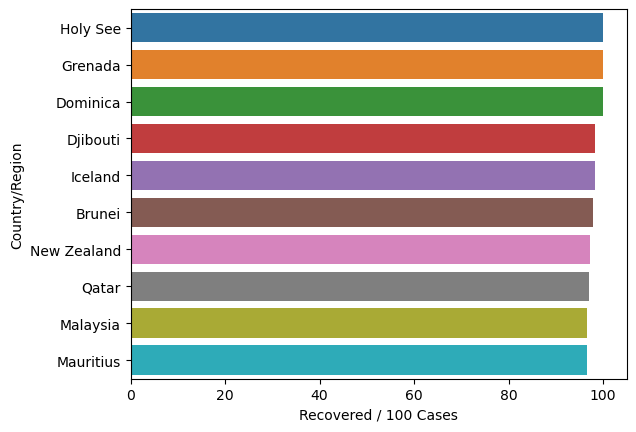

In [31]:
sns.barplot(freq_recv , y = 'Country/Region' , x = 'Recovered / 100 Cases')

> **Holy see got the maximum recovery cases**

# **world wise last week confirmation**

In [32]:
cnfrm = df[['Country/Region' , 'Confirmed last week']]

In [33]:
cnfrm = cnfrm.sort_values(ascending = False , by = 'Confirmed last week')[0:10]

<Axes: xlabel='Confirmed last week', ylabel='Country/Region'>

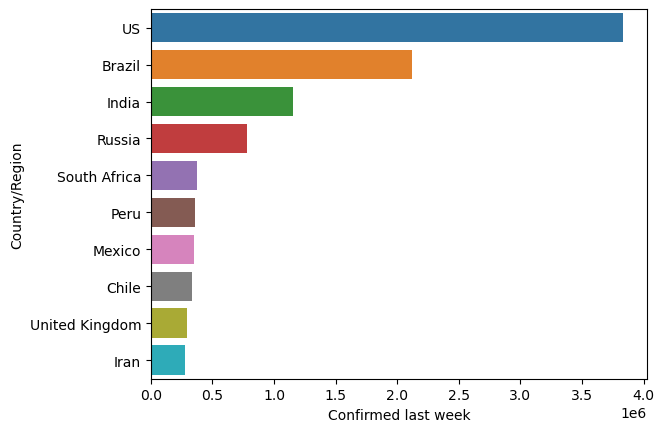

In [34]:
sns.barplot(cnfrm , x = 'Confirmed last week' , y = 'Country/Region')

> **US got the heighest confirmed cases in last week**

# **max death, confirmed and recovery as per who region**

In [35]:
who = df[['Deaths' , 'Confirmed' , 'Recovered' , 'WHO Region']]

In [36]:
who1 = who.sort_values(ascending = False , by ='Deaths' )[0:1]

In [37]:
who4 = who.sort_values(ascending = False , by ='Confirmed' )[0:1]

In [38]:
who3 = who.sort_values(ascending = False , by ='Recovered' )[0:1]

In [39]:
print(who1)
print(who4) 
print(who3)

     Deaths  Confirmed  Recovered WHO Region
173  148011    4290259    1325804   Americas
     Deaths  Confirmed  Recovered WHO Region
173  148011    4290259    1325804   Americas
    Deaths  Confirmed  Recovered WHO Region
23   87618    2442375    1846641   Americas


# **EDA 2**

In [40]:
df1 = pd.read_csv(r'/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')

In [41]:
df1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


> **as we can see that US is top in affected, confirmed and mortality rate so the latitude and longitude of us is given below**

In [42]:
df2 = df1[df1['Country/Region'] == 'US']
US_LAT_LONG = df2[['Country/Region','Lat' , 'Long']][0:1]
US_LAT_LONG

,Country/Region,Lat,Long
223,US,40.0,-100.0


> **as we can see that BRAZIL & INDIA is top in recovery rate so the latitude and longitude  is given below**

In [43]:
df2 = df1[(df1['Country/Region'] == 'Brazil') | (df1['Country/Region'] == 'India')]
df2 = df2[['Country/Region' , 'Lat' , 'Long']][0:2]
df2

,Country/Region,Lat,Long
28,Brazil,-14.235000,-51.92530
129,India,20.593684,78.96288


> **as we can see see yemen experienced the max frequency in death case so longitude and latitude of it is**

In [44]:
df2 = df1[(df1['Country/Region'] == 'Yemen')]
df2 = df2[['Country/Region' , 'Lat' , 'Long']][0:1]
df2

,Country/Region,Lat,Long
257,Yemen,15.552727,48.516388


> **as we can seemax frequency in new recovery case is bold is holy see, grenada and dominica so latitude and longitude of there are**

In [45]:
df2 = df1[(df1['Country/Region'] == 'Holy See')]
df2 = df2[['Country/Region' , 'Lat' , 'Long']][0:1]
df2

,Country/Region,Lat,Long
125,Holy See,41.9029,12.4534


In [46]:
df2 = df1[(df1['Country/Region'] == 'Dominica')]
df2 = df2[['Country/Region' , 'Lat' , 'Long']][0:1]
df2

,Country/Region,Lat,Long
229,Dominica,15.415,-61.371


In [47]:
df2 = df1[ (df1['Country/Region'] == 'Grenada')]
df2 = df2[['Country/Region' , 'Lat' , 'Long']][0:1]
df2

,Country/Region,Lat,Long
230,Grenada,12.1165,-61.679


# **EDA 3**

In [48]:
df3 = pd.read_csv(r'/kaggle/input/corona-virus-report/day_wise.csv')

In [49]:
df3.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [50]:
df3['Date'] = pd.to_datetime(df3['Date'])

In [51]:
df3['year'] = pd.DatetimeIndex(df3['Date']).year

In [52]:
df3['month'] = pd.DatetimeIndex(df3['Date']).month

In [53]:
df3['day'] = pd.DatetimeIndex(df3['Date']).day

In [54]:
df3 = df3.drop('Date' , axis = 1)

In [55]:
df3.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,year,month,day
0,555,17,28,510,0,0,0,3.06,5.05,60.71,6,2020,1,22
1,654,18,30,606,99,1,2,2.75,4.59,60.00,8,2020,1,23
2,941,26,36,879,287,8,6,2.76,3.83,72.22,9,2020,1,24
3,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,2020,1,25
4,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,2020,1,26


In [56]:
jan_month = df3[df3['month'] == 1]

In [57]:
jan_month

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,year,month,day
0,555,17,28,510,0,0,0,3.06,5.05,60.71,6,2020,1,22
1,654,18,30,606,99,1,2,2.75,4.59,60.00,8,2020,1,23
2,941,26,36,879,287,8,6,2.76,3.83,72.22,9,2020,1,24
3,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,2020,1,25
4,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,2020,1,26
5,2927,82,61,2784,809,26,9,2.80,2.08,134.43,16,2020,1,27
6,5578,131,107,5340,2651,49,46,2.35,1.92,122.43,16,2020,1,28
7,6166,133,125,5908,588,2,18,2.16,2.03,106.40,18,2020,1,29
8,8234,171,141,7922,2068,38,16,2.08,1.71,121.28,20,2020,1,30
9,9927,213,219,9495,1693,42,78,2.15,2.21,97.26,24,2020,1,31


# **trends of days of january month in different aspects**

In [58]:
jan_month = jan_month.drop(['No. of countries' , 'year' , 'month'] , axis = 1)

In [59]:
jan_month

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,day
0,555,17,28,510,0,0,0,3.06,5.05,60.71,22
1,654,18,30,606,99,1,2,2.75,4.59,60.00,23
2,941,26,36,879,287,8,6,2.76,3.83,72.22,24
3,1434,42,39,1353,493,16,3,2.93,2.72,107.69,25
4,2118,56,52,2010,684,14,13,2.64,2.46,107.69,26
5,2927,82,61,2784,809,26,9,2.80,2.08,134.43,27
6,5578,131,107,5340,2651,49,46,2.35,1.92,122.43,28
7,6166,133,125,5908,588,2,18,2.16,2.03,106.40,29
8,8234,171,141,7922,2068,38,16,2.08,1.71,121.28,30
9,9927,213,219,9495,1693,42,78,2.15,2.21,97.26,31


In [60]:
def scatter (y):
    sns.scatterplot(jan_month , x = 'day' , y = y)

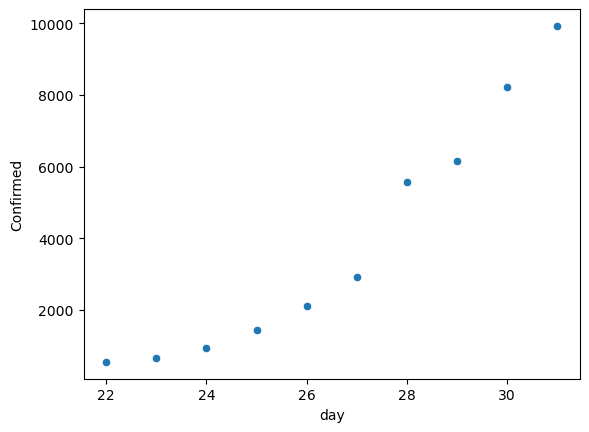

In [61]:
scatter('Confirmed')

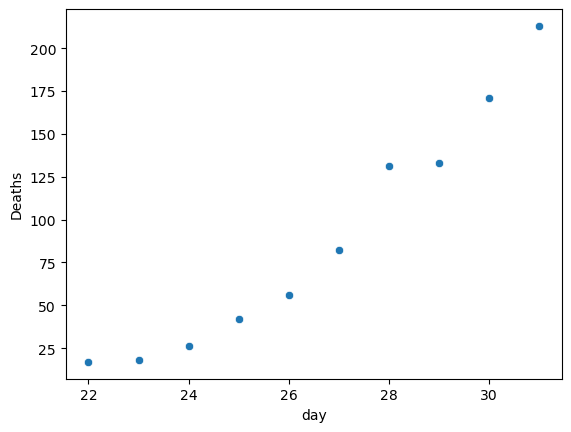

In [62]:
scatter('Deaths')

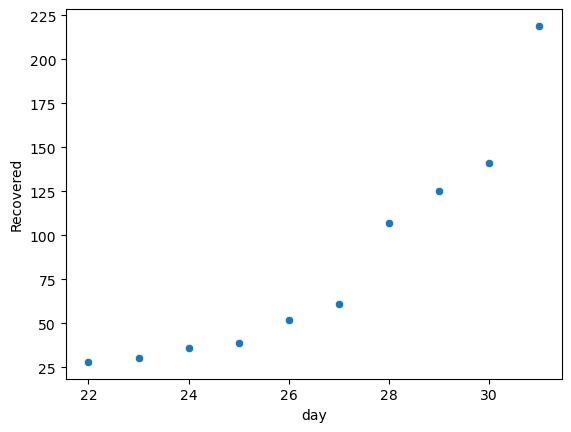

In [63]:
scatter('Recovered')

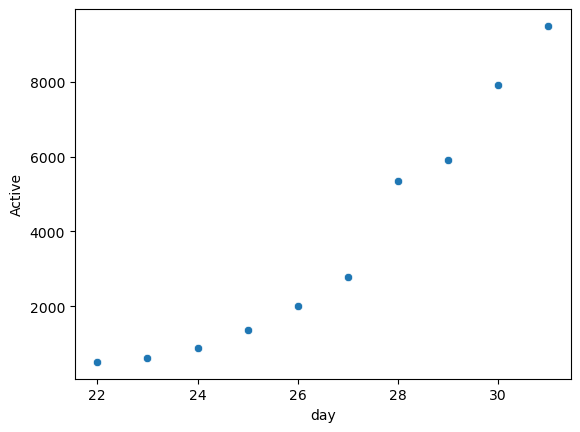

In [64]:
scatter('Active')

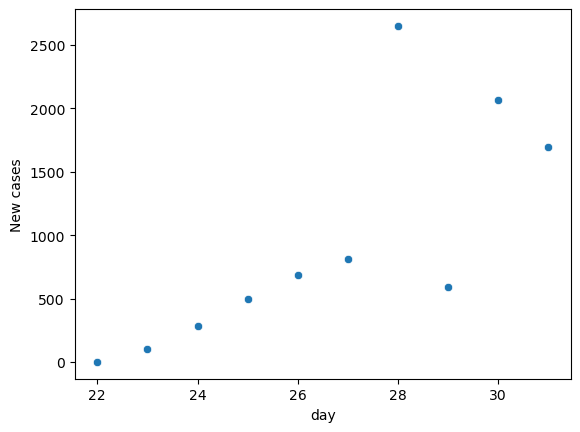

In [65]:
scatter('New cases')

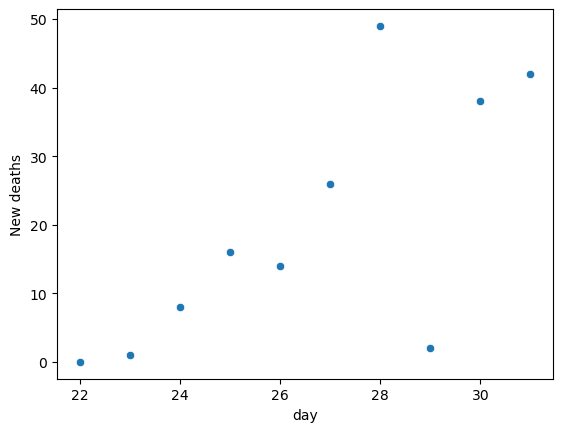

In [66]:
scatter('New deaths')

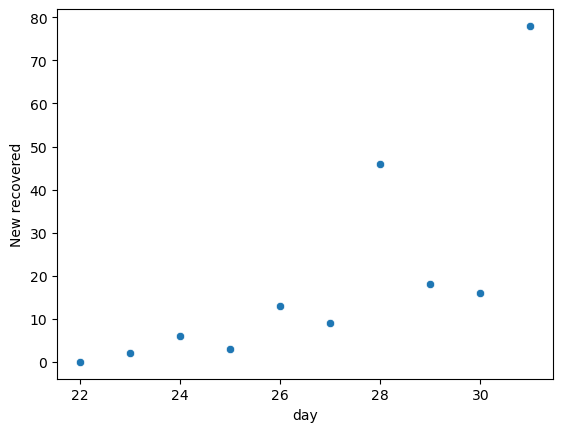

In [67]:
scatter('New recovered')

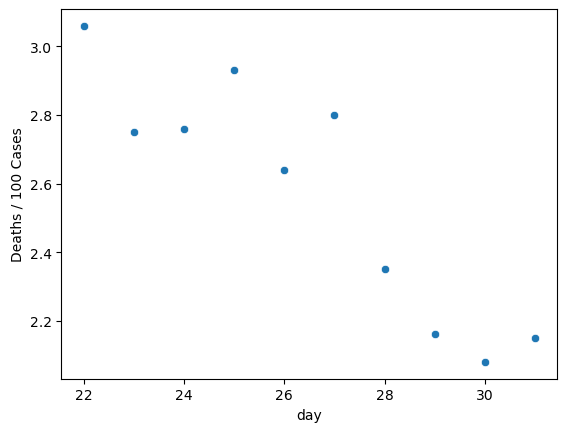

In [68]:
scatter('Deaths / 100 Cases')

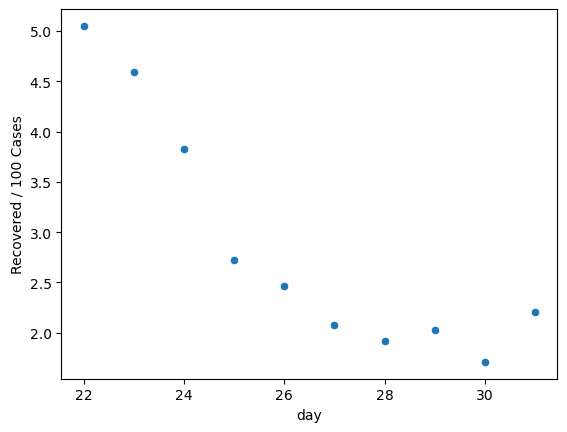

In [69]:
scatter('Recovered / 100 Cases')

* > **in january month the trend of confirmed death and recovery is same it is too much high**
* > **in january month new cases, death and reovered are increasing but the trend are not uniform**
* > **in january month death and recovered per 100 cases are both are decreasing which is good from a particular sight but as recovered is also decreasing it may be due to mutation of viruses**


# **month wise distribution**

In [70]:
df3.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
       'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases',
       'Deaths / 100 Recovered', 'No. of countries', 'year', 'month', 'day'],
      dtype='object')

In [71]:
month_data = df3.groupby('month')[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
       'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases',
       'Deaths / 100 Recovered']].mean()

In [72]:
def scatter1 (y):
    sns.scatterplot(month_data , x = 'month' , y = y)

None


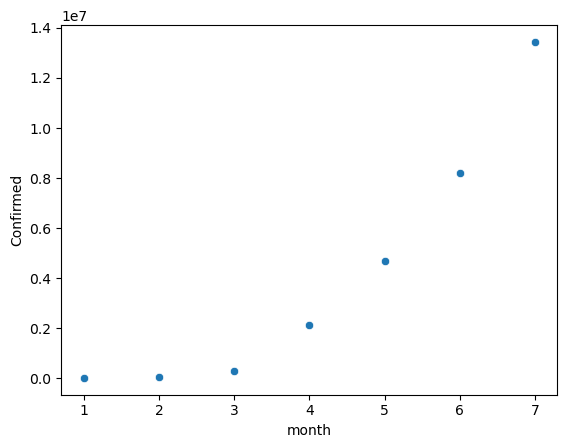

In [73]:
print(scatter1('Confirmed'))


None


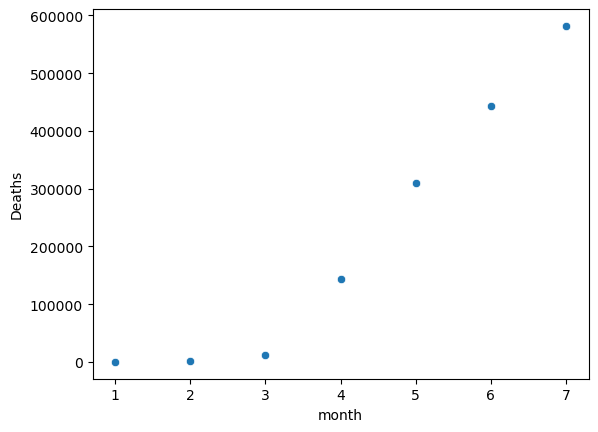

In [74]:
print(scatter1('Deaths'))


None


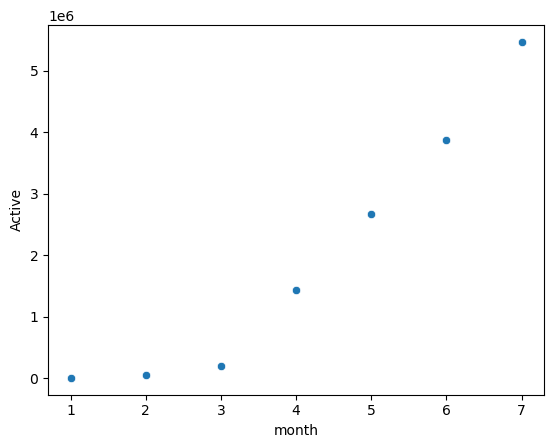

In [75]:
print(scatter1('Active'))


None


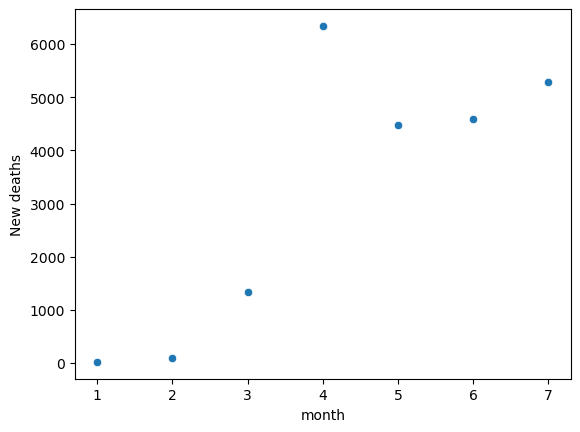

In [76]:
print(scatter1('New deaths'))


None


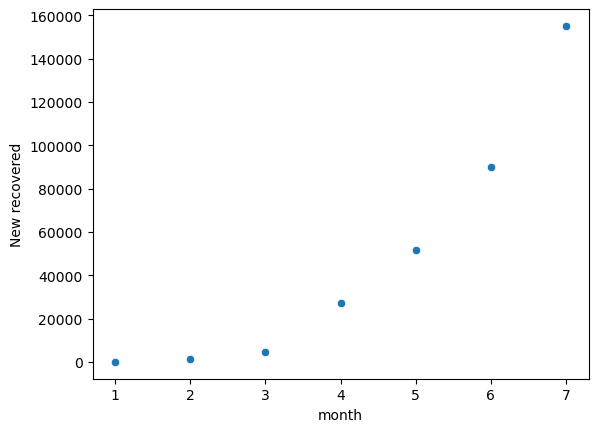

In [77]:
print(scatter1('New recovered'))


None


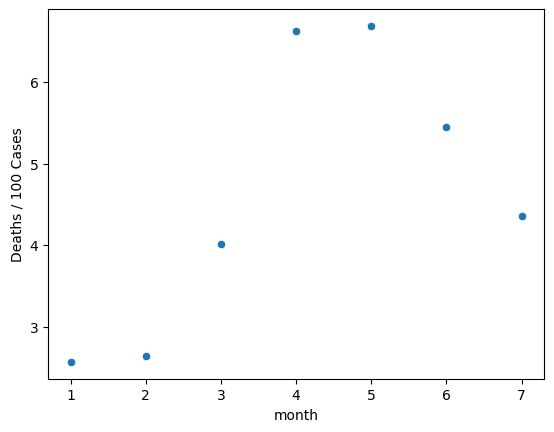

In [78]:
print(scatter1('Deaths / 100 Cases'))


None


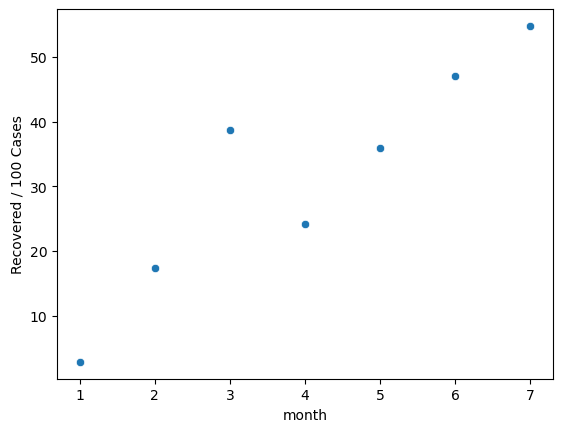

In [79]:
print(scatter1('Recovered / 100 Cases'))


None


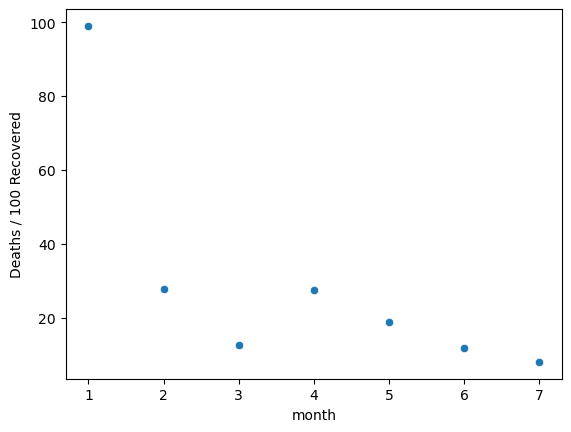

In [80]:
print(scatter1('Deaths / 100 Recovered'));

* > **month wise confirmed, deaths, actives cases are sharply increasing**
* > **new recovered and recovered/100 cases are increasing**
* > **deaths per 100 cases are increasing and then decreasing but deaths frequency is dereasing which is good sign**

# **EDA 4**

In [81]:
df4 = pd.read_csv(r'/kaggle/input/corona-virus-report/full_grouped.csv')

In [82]:
df4 = df4[['Country/Region' , 'WHO Region']]

In [83]:
df4.shape

(35156, 2)

In [84]:
df3.shape

(188, 14)

In [85]:
df5 = pd.concat([df3,df4],join = 'outer' ,axis = 1 )

In [86]:
df5.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,year,month,day,Country/Region,WHO Region
0,555.0,17.0,28.0,510.0,0.0,0.0,0.0,3.06,5.05,60.71,6.0,2020.0,1.0,22.0,Afghanistan,Eastern Mediterranean
1,654.0,18.0,30.0,606.0,99.0,1.0,2.0,2.75,4.59,60.00,8.0,2020.0,1.0,23.0,Albania,Europe
2,941.0,26.0,36.0,879.0,287.0,8.0,6.0,2.76,3.83,72.22,9.0,2020.0,1.0,24.0,Algeria,Africa
3,1434.0,42.0,39.0,1353.0,493.0,16.0,3.0,2.93,2.72,107.69,11.0,2020.0,1.0,25.0,Andorra,Europe
4,2118.0,56.0,52.0,2010.0,684.0,14.0,13.0,2.64,2.46,107.69,13.0,2020.0,1.0,26.0,Angola,Africa


> **in eda 1 we saw that some country have typical charachteistics of covid we only analyses those**

In [87]:
us = df5[df5['Country/Region'] == 'US'][0:1]
us

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,year,month,day,Country/Region,WHO Region
173,13107415.0,572808.0,7181139.0,5353468.0,192779.0,3815.0,139965.0,4.37,54.79,7.98,187.0,2020.0,7.0,13.0,US,Americas


In [88]:
br = df5[df5['Country/Region'] == 'Brazil'][0:1]
br

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,year,month,day,Country/Region,WHO Region
23,66690.0,1523.0,7613.0,57554.0,6484.0,152.0,1683.0,2.28,11.42,20.01,27.0,2020.0,2.0,14.0,Brazil,Americas


In [89]:
ind = df5[df5['Country/Region'] == 'India'][0:1]
ind

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,year,month,day,Country/Region,WHO Region
79,1671907.0,108551.0,367477.0,1195879.0,87658.0,7272.0,21128.0,6.49,21.98,29.54,184.0,2020.0,4.0,10.0,India,South-East Asia


In [90]:
ymn = df5[df5['Country/Region'] == 'Yemen'][0:1]
ymn

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,year,month,day,Country/Region,WHO Region
184,15791645.0,639650.0,8939705.0,6212290.0,281164.0,6144.0,228736.0,4.05,56.61,7.16,187.0,2020.0,7.0,24.0,Yemen,Eastern Mediterranean


In [91]:
hs = df5[df5['Country/Region'] == 'Holy See'][0:1]
hs

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,year,month,day,Country/Region,WHO Region
75,1336976.0,79013.0,270812.0,987151.0,72672.0,5832.0,16335.0,5.91,20.26,29.18,183.0,2020.0,4.0,6.0,Holy See,Europe


In [92]:
gr = df5[df5['Country/Region'] == 'Grenada'][0:1]
gr

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,year,month,day,Country/Region,WHO Region
69,871355.0,44478.0,174074.0,652803.0,76416.0,4844.0,12367.0,5.1,19.98,25.55,179.0,2020.0,3.0,31.0,Grenada,Americas


In [93]:
dm = df5[df5['Country/Region'] == 'Dominica'][0:1]
dm

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,year,month,day,Country/Region,WHO Region
49,125853.0,4604.0,65113.0,56136.0,7663.0,344.0,2311.0,3.66,51.74,7.07,111.0,2020.0,3.0,11.0,Dominica,Americas


> **we are only getting 7 typical date for each and every country due to the shape difference between two dataset**

# **EDA 5**

In [94]:
df6 = pd.read_csv(r'/kaggle/input/corona-virus-report/usa_county_wise.csv')

In [95]:
df6.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


> **there is nothing to visualize in this dataset**

# **EDA 6**

In [96]:
df7 = pd.read_csv(r'/kaggle/input/corona-virus-report/worldometer_data.csv')

In [97]:
df7.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [98]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [99]:
df7 = df7.drop(['NewCases' , 'NewDeaths' , 'NewRecovered'] , axis = 1)

In [100]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   TotalDeaths       188 non-null    float64
 5   TotalRecovered    205 non-null    float64
 6   ActiveCases       205 non-null    float64
 7   Serious,Critical  122 non-null    float64
 8   Tot Cases/1M pop  208 non-null    float64
 9   Deaths/1M pop     187 non-null    float64
 10  TotalTests        191 non-null    float64
 11  Tests/1M pop      191 non-null    float64
 12  WHO Region        184 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 21.4+ KB


In [101]:
df7.head()

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [102]:
act2_data = df7[['Country/Region' , 'ActiveCases' , 'Tot Cases/1M pop' , 'Deaths/1M pop' , 'TotalTests' , 'Tests/1M pop']]

In [103]:
act2_data.head()

,Country/Region,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,USA,2292707.0,15194.0,492.0,63139605.0,190640.0
1,Brazil,771258.0,13716.0,464.0,13206188.0,62085.0
2,India,606387.0,1466.0,30.0,22149351.0,16035.0
3,Russia,180931.0,5974.0,100.0,29716907.0,203623.0
4,South Africa,141264.0,9063.0,162.0,3149807.0,53044.0


# **country that gives heighest active cases by bubble chart**

In [104]:
act2_data = act2_data.set_index('Country/Region')

In [105]:
act2_data = act2_data.dropna()

In [106]:
act2_data = act2_data.sort_values(ascending = False,by = 'ActiveCases')[0:10]

In [107]:
act2_data

,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
Country/Region,,,,,
USA,2292707.0,15194.0,492.0,63139605.0,190640.0
Brazil,771258.0,13716.0,464.0,13206188.0,62085.0
India,606387.0,1466.0,30.0,22149351.0,16035.0
Russia,180931.0,5974.0,100.0,29716907.0,203623.0
Colombia,153416.0,7023.0,234.0,1801835.0,35374.0
South Africa,141264.0,9063.0,162.0,3149807.0,53044.0
Peru,124648.0,13793.0,619.0,2493429.0,75521.0
Argentina,124092.0,5044.0,94.0,794544.0,17564.0
Mexico,103325.0,3585.0,391.0,1056915.0,8189.0


In [108]:
import plotly.express as px

In [109]:
px.scatter(act2_data,x = 'ActiveCases' , y = 'Tot Cases/1M pop' 
           , size = 'ActiveCases' , color = 'Tot Cases/1M pop'
           , hover_name = act2_data.index , size_max = 50)

> **the top 3 country that has experienced maximum active cases is US BRAZIL and INDIA bubbles show the heighest active cases**

# **country that has heighest frequency of active cases**

In [110]:
act3_data = act2_data.sort_values(ascending = False,by = 'Tot Cases/1M pop')[0:10]

In [111]:
px.scatter(act3_data,x = 'ActiveCases' , y = 'Tot Cases/1M pop' 
           , color = 'ActiveCases' , size = 'Tot Cases/1M pop'
           , hover_name = act3_data.index , size_max = 50)

>  **the top 3 country that has experienced maximum active cases frequency is US BRAZIL and PERU bubbles show the heighest active cases frequency**

# **country that having heighest TotalTests**

In [112]:
act4_data = act2_data.sort_values(ascending = False,by = 'TotalTests')[0:10]

In [113]:
px.scatter(act4_data , x = 'TotalTests' , y = 'Tests/1M pop',
          color = 'Tests/1M pop' , size = 'TotalTests',
          hover_name = act4_data.index , size_max = 50)

> **the top 3 country that has experienced maximum active cases is US RUSSIA and INDIA bubbles show the heighest total tests**

# **country that having heighest TotalTests frequency**

In [114]:
act5_data = act2_data.sort_values(ascending = False,by = 'Tests/1M pop')[0:10]

In [115]:
px.scatter(act4_data , x = 'TotalTests' , y = 'Tests/1M pop',
          size = 'Tests/1M pop' , color = 'TotalTests',
          hover_name = act4_data.index , size_max = 50)

> **the top 3 country that has experienced maximum total test frequency is US RUSSIA and PERU bubbles show the heighest total test frequencys**

# **country that having heighest death frequency**

In [116]:
act6_data = act2_data.sort_values(ascending = False,by = 'Deaths/1M pop')[0:10]

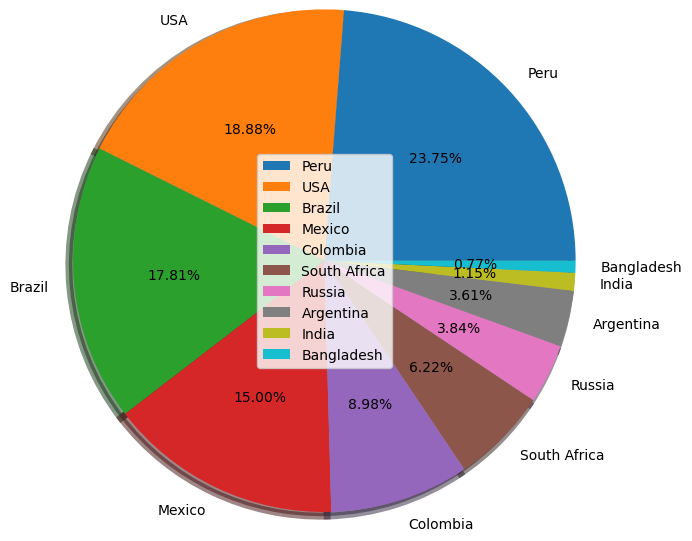

In [117]:
plt.pie(act6_data['Deaths/1M pop'] , labels = act6_data.index , autopct = "%.2f%%" , radius = 1.7,
       shadow = True,textprops = {'fontsize':10},wedgeprops = {'linewidth':5});
plt.legend(loc = 10)

> **the top 3 country that has experienced maximum death frequency is PERU US and BRAZIL**

# **hey kagglers if you visit this notebook or take suggestion from this notebook its a request pls leave a voting its gives me energy to creat more notebook**